In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from PIL import Image
# from pynfft.nfft import NFFT


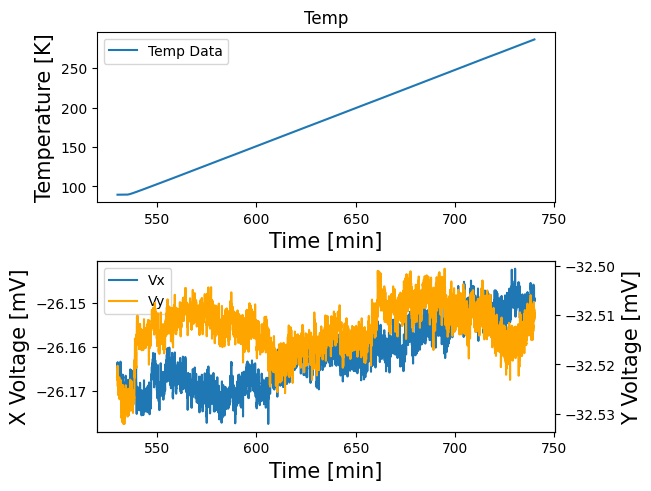

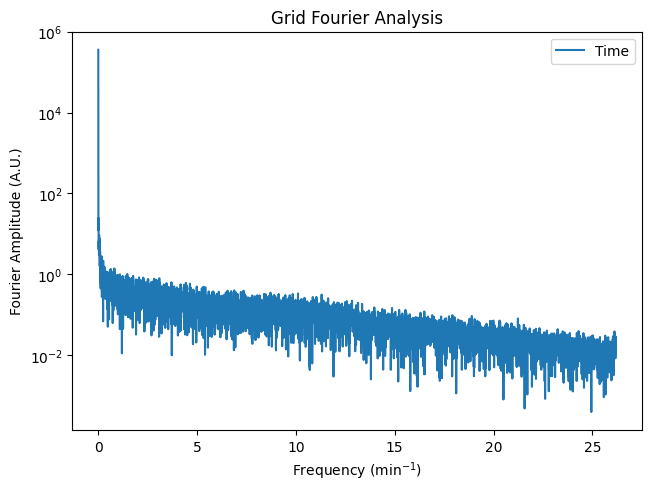

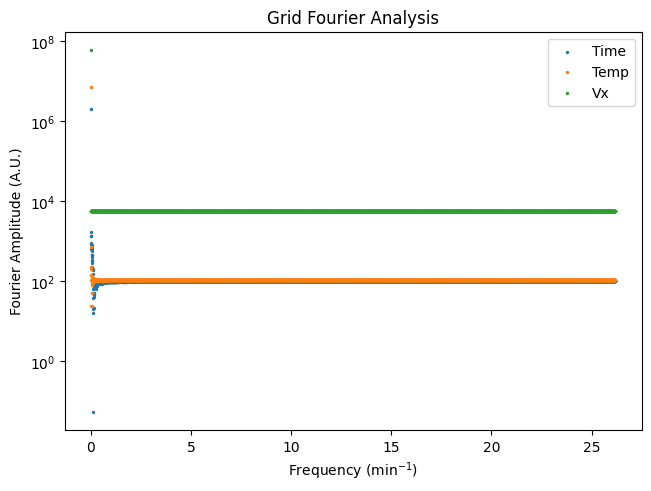

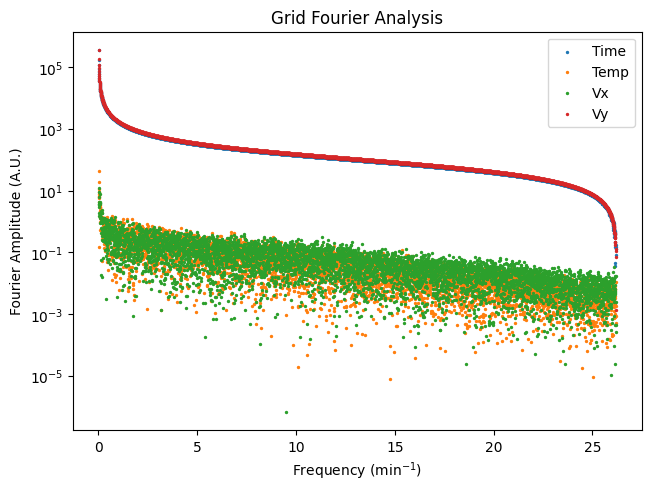

In [10]:
path_prefix = 'C:/Users/blake/Documents/VSCode/Python/Greven/RawData/'
path_suffix = '.dat'
filename = 'Empty_Cal_7_26'

data_path = path_prefix + filename + path_suffix

all_data = np.genfromtxt(data_path, delimiter='\t')
t = np.array(all_data[1:,0])
T = np.array(all_data[1:,1])
x = np.array(all_data[1:,2])*1000
y = np.array(all_data[1:,3])*1000

# remove 0 temp terms
a = 77 #lower temp bound
b = 300 #upper temp bound
c = 530 #lower time bound
d = 740 #upper time bound
indexes = np.logical_and(T >= a, T <= b)
t = t[indexes]
T = T[indexes]
x = x[indexes]
y = y[indexes]

indexes = np.logical_and(t >= c, t <= d)
t = t[indexes]
T = T[indexes]
x = x[indexes]
y = y[indexes]

fig0 = plt.figure(constrained_layout = True)
ax = fig0.add_subplot(2, 1, 1)
bx = fig0.add_subplot(2, 1, 2)
ax.plot(t,T)
ax.set_xlabel('Time [min]',fontsize = 15)
ax.set_ylabel('Temperature [K]',fontsize = 15)
ax.set_title('Temp')
ax.legend(['Temp Data'])
cx = bx.twinx()
bx.plot(t,x)
bx.plot(t[0],x[0],color= 'orange')
bx.set_xlabel('Time [min]',fontsize = 15)
bx.set_ylabel('X Voltage [mV]',fontsize = 15)
bx.legend(['Vx','Vy'])
cx.plot(t,y,color='orange')
cx.set_ylabel('Y Voltage [mV]',fontsize = 15)

# not_blue = (r+b)/2 #Now i am using cyan
l = len(t)
time_amps = fft(t)[:l//2]
temp_amps = fft(T)[:l//2]
x_amps = fft(x)[:l//2]
y_amps = fft(y)[:l//2]
linear = fft(np.arange(l))[:l//2]

#normalize amplitudes
# time_amps /= time_amps.max()
# temp_amps /= temp_amps.max()
# x_amps /= x_amps.max()
# y_amps /= y_amps.max()
# linear /= linear.max()

# average sampling rate = points collected/total time
total_time = (t[-1]-t[0])

freqs = fftfreq(l, total_time/l)[:l//2]# get the frequencies that coorespond to the amplitudes calculated in the previous line

# top_line_spacing = x_freqs[np.argmax(np.absolute(top_amplitudes)[1:xlen//2])+1]# this is the boxes per pixel

fig1 = plt.figure(constrained_layout = True)
dx = fig1.add_subplot(1, 1, 1)
# dx.plot(freqs,np.absolute(time_amps))
# dx.plot(freqs,np.absolute(temp_amps))
# dx.plot(freqs,np.absolute(x_amps))
dx.plot(freqs,np.absolute(y_amps))
# dx.plot(freqs,np.absolute(linear))
dx.set_title('Grid Fourier Analysis')
dx.set_xlabel(r'Frequency (min$^{-1}$)')
dx.set_ylabel('Fourier Amplitude (A.U.)')
dx.legend(['Time','Temp','Vx','Vy'])
# dx.set_xlim(0,.1)
# dx.set_xscale('log')
dx.set_yscale('log')

fig2 = plt.figure(constrained_layout = True)
ex = fig2.add_subplot(1, 1, 1)
ex.scatter(freqs,np.absolute(np.real(temp_amps)),s=2)
# ex.scatter(freqs,np.real(x_amps),s=2)
# ex.scatter(freqs,np.real(y_amps),s=2)
ex.scatter(freqs,np.absolute(np.real(time_amps)),s=2)
ex.scatter(freqs,np.absolute(np.real(linear)),s=2)
ex.set_title('Grid Fourier Analysis')
ex.set_xlabel(r'Frequency (min$^{-1}$)')
ex.set_ylabel('Fourier Amplitude (A.U.)')
ex.legend(['Time','Temp','Vx','Vy'])
# ex.set_xlim(0,.1)
# ex.set_xscale('log')
ex.set_yscale('log')

fig3 = plt.figure(constrained_layout = True)
fx = fig3.add_subplot(1, 1, 1)
fx.scatter(freqs,np.absolute(np.imag(temp_amps)),s=2)
fx.scatter(freqs,np.absolute(np.imag(x_amps)),s=2)
fx.scatter(freqs,np.absolute(np.imag(y_amps)),s=2)
fx.scatter(freqs,np.absolute(np.imag(time_amps)),s=2)
# fx.scatter(freqs,np.absolute(np.imag(linear)),s=2)
fx.set_title('Grid Fourier Analysis')
fx.set_xlabel(r'Frequency (min$^{-1}$)')
fx.set_ylabel('Fourier Amplitude (A.U.)')
fx.legend(['Time','Temp','Vx','Vy'])
# fx.set_xlim(0,.1)
# fx.set_xscale('log')
fx.set_yscale('log')
plt.show()